# Regression-House-Pricing 

Let's study regression by using Light Gradient Boosting and different variations of a dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../main/')

In [2]:
from sklearn.model_selection import train_test_split
from dsbase.ModelDSBase import ModelDSBaseWrapper

In [3]:
from dsbase.models.regression.LightGradientBoostingRegressionDSBase import LightGradientBoostingRegressionDSBaseModel
from dsbase.models.regression.LightGradientBoostingRegressionDSBase import LightGradientBoostingRegressionDSBaseModelParamsToMap

/anaconda3/envs/dsbase/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If thi

In [4]:
dataset_path = '../../datasets/house-pricing'

In [5]:
df = pd.read_csv(dataset_path + '/tt_null_impute_encode.csv')

In [6]:
df_train = df[df['TT']==1]
X = df_train.drop(['Unnamed: 0','TT','SalePrice'], axis=1).values
y = df_train['SalePrice'].values

## Simple case

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=31, n_estimators=100, learning_rate=0.1,subsample_for_bin=200000, reg_alpha=0, reg_lambda=0)
lgbr = ModelDSBaseWrapper('LGBR',X_train,y_train,X_test, y_test,[20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],LightGradientBoostingRegressionDSBaseModel,params)

X_train size:(978, 108)
y_train size:(978,)
X_test size:(482, 108)
y_test size:(482,)
initiating model LGBR0. LightGradientBoostingRegression
initiating model LGBR1. LightGradientBoostingRegression
initiating model LGBR2. LightGradientBoostingRegression
initiating model LGBR3. LightGradientBoostingRegression
initiating model LGBR4. LightGradientBoostingRegression
initiating model LGBR5. LightGradientBoostingRegression
initiating model LGBR6. LightGradientBoostingRegression
initiating model LGBR7. LightGradientBoostingRegression
initiating model LGBR8. LightGradientBoostingRegression
initiating model LGBR9. LightGradientBoostingRegression
initiating model LGBR10. LightGradientBoostingRegression
initiating model LGBR11. LightGradientBoostingRegression
initiating model LGBR12. LightGradientBoostingRegression
initiating model LGBR13. LightGradientBoostingRegression
initiating model LGBR14. LightGradientBoostingRegression
initiating model LGBR15. LightGradientBoostingRegression
initiating m

In [9]:
lgbr.train()

training model LGBR0. LightGradientBoostingRegression
training model LGBR1. LightGradientBoostingRegression
training model LGBR2. LightGradientBoostingRegression
training model LGBR3. LightGradientBoostingRegression
training model LGBR4. LightGradientBoostingRegression
training model LGBR5. LightGradientBoostingRegression
training model LGBR6. LightGradientBoostingRegression
training model LGBR7. LightGradientBoostingRegression
training model LGBR8. LightGradientBoostingRegression
training model LGBR9. LightGradientBoostingRegression
training model LGBR10. LightGradientBoostingRegression
training model LGBR11. LightGradientBoostingRegression
training model LGBR12. LightGradientBoostingRegression
training model LGBR13. LightGradientBoostingRegression
training model LGBR14. LightGradientBoostingRegression
training model LGBR15. LightGradientBoostingRegression
training model LGBR16. LightGradientBoostingRegression


Check importance of variables: 

In [10]:
df_train.drop(['Unnamed: 0','TT','SalePrice'], axis=1).columns[lgbr.model.model.feature_importances_.argsort()]

Index(['Utilities_NoSeWa', 'Utilities_NULL', 'PoolArea', 'RoofMatl',
       'LandContour_Low', 'BsmtFinSF1_isnan', 'BsmtFinSF2_isnan',
       'BsmtFullBath_isnan', 'BsmtHalfBath_isnan', 'BsmtUnfSF_isnan',
       ...
       'Neighborhood', 'Id', 'YearBuilt', 'LotFrontage', '1stFlrSF',
       'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF', 'LotArea', 'GrLivArea'],
      dtype='object', length=108)

In [11]:
lclgdbr=lgbr.getLearningCurves()

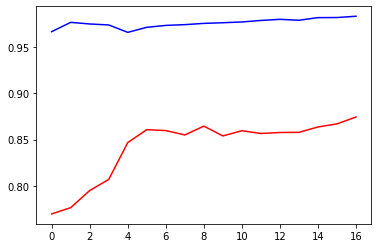

In [12]:
plt.plot(lclgdbr[0,:],'b',lclgdbr[1,:],'r')

In [13]:
lgbr.getScore()

0.8744187303670445

## K-Fold Validation 

In [14]:
from dsbase.KFoldDSBase import KFoldDSBase

In [15]:
params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=31, n_estimators=100, learning_rate=0.1,subsample_for_bin=200000, reg_alpha=0, reg_lambda=0)

In [16]:
kf = KFoldDSBase(X, y, 5, LightGradientBoostingRegressionDSBaseModel, 'LGBR', params)

In [17]:
kf.train()

---- Model  1 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9781263024222923 / test score: 0.8978994973195632
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9789614200061131 / test score: 0.8239176982013554
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train s

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
kf.getMeanScore()

(0.9794154704452629, 0.868810829788548)

In [19]:
model = kf.getBestModel()

In [20]:
model.model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=31,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=1, num_leaves=31, objective='regression',
              random_state=None, reg_alpha=0, reg_lambda=0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Parameter optimization

In [21]:
from dsbase.SearchOptimumParams import evaluateParams, randomElement, showSearchOptimumHyperParametersReport

In [22]:
max_depth=[10,20,30,40,50,60,70,80,90,100]
n_estimators=[70,80,90,100,110,120,130,140,150]
learning_rate=[0.01,0.03,0.1,0.3,1]
subsample_for_bin=[10000,30000,100000,200000,500000,1000000]
reg_alpha=[0,50000,75000,90000,100000]
reg_lambda=[0,20,50,100,150,200]

In [23]:
num_tries = 50

In [24]:
params = []
for i in range(num_tries):
    p = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=randomElement(max_depth),
                                                                   n_estimators=randomElement(n_estimators),
                                                                   learning_rate=randomElement(learning_rate),
                                                                   subsample_for_bin=randomElement(subsample_for_bin),
                                                                   reg_alpha=randomElement(reg_alpha),
                                                                   reg_lambda=randomElement(reg_lambda))
    params.append(p)

In [25]:
tries = evaluateParams(X, y, LightGradientBoostingRegressionDSBaseModel, 'LGBR', params, num_tries)

---- Model  1 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9998773876774755 / test score: 0.8522448315223841
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9997588330426116 / test score: 0.8019303511784811
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train s

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.6538065388145538 / test score: 0.5710920039191278
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6512758553516035 / test score: 0.6602855423899392
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.662547815918692 / test score: 0.5819814076939631
---------------------------------------------------
Avg Score: nan
****** Result try 1 : 0.6483135292374819  /  0.6300881538283549
---- Model  1 -------------------------------------
X_train si

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9944788229234338 / test score: 0.8903296673122699
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9950593388798032 / test score: 0.8257516150188212
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9947179889530523 / test score: 0.8671426498948509
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.6411061396203412 / test score: 0.6474024270203027
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6435884934775229 / test score: 0.5539252312896776
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6460381668541735 / test score: 0.6252349027076678
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9866028775605232 / test score: 0.8896571302579716
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9882441999388633 / test score: 0.8254247467781739
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9875817199329002 / test score: 0.8747198871598477
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9969016430579878 / test score: 0.7284725041355649
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9973350429402349 / test score: 0.7797045064957436
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.997031896377415 / test score: 0.7180790728222928
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9413774076521464 / test score: 0.8903909330395275
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9458992347598967 / test score: 0.8568270115394234
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9435473262408918 / test score: 0.872650263096125
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.785620119298072 / test score: 0.8092428510439683
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7995614686983411 / test score: 0.7205632286557311
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7987908470730557 / test score: 0.7881489143898006
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.7915021460899225 / test score: 0.8092496879168957
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7886683913750481 / test score: 0.7993105980746119
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7994089159587695 / test score: 0.7256083455949898
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.7209647747687269 / test score: 0.6416530213201752
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7194022381395466 / test score: 0.7187286312702874
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7331704698495238 / test score: 0.6381548138945959
---------------------------------------------------
Avg Score: nan
****** Result try 9 : 0.7181656568466211  /  0.6940848014465714
---- Model  1 -------------------------------------
X_train s

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.5402167593875788 / test score: 0.5704419867864783
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5289858145083202 / test score: 0.5562257322223331
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5512416362899085 / test score: 0.47361804857693435
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8863543933014351 / test score: 0.869138816741882
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8946192408411274 / test score: 0.853158440714619
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8918643835209106 / test score: 0.813784885913301
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
ini

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


---- Model  1 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9940573734560815 / test score: 0.8478782314862063
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9933958218991232 / test score: 0.8365025747905445
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train s

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


---- Model  1 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6302385317217385 / test score: 0.6606564431635704
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6203014885599013 / test score: 0.6444857446812596
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train s

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9999999938795465 / test score: 0.7959026256961064
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.999999827435988 / test score: 0.704939654246683
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9999999990217957 / test score: 0.748682331216231
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
ini

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9991615806912366 / test score: 0.86344105712332
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9989743585023163 / test score: 0.8349844343549033
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9990446039398841 / test score: 0.8380095178707894
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
in

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9745572509290202 / test score: 0.8532536095412057
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9758744459328079 / test score: 0.8646159923579517
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9746897010500962 / test score: 0.8892231095209102
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.5211979165279341 / test score: 0.5512373017992038
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5096944526411216 / test score: 0.528268840613743
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5283173690917289 / test score: 0.4578616198031139
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.5246809349506356 / test score: 0.5384422416484944
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5357150591099005 / test score: 0.46760958606572844
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5319533354039008 / test score: 0.5252952897620482
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9691357924384122 / test score: 0.8870811646812747
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9703220404594306 / test score: 0.8449992454004686
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9711617840109817 / test score: 0.8783819388427831
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9980409999197623 / test score: 0.809328480471321
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9980748743712583 / test score: 0.8282589641933641
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9985428915020985 / test score: 0.8013633235266958
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.7440377497915457 / test score: 0.7703463219994501
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.738113348786511 / test score: 0.7600452527427489
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7529325693959739 / test score: 0.6758171410066012
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8689994088047693 / test score: 0.8701173991425009
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8761707314501224 / test score: 0.8008919207637041
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.873642859075614 / test score: 0.8585503548557256
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9878437630381385 / test score: 0.8953691704218925
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9885684680680531 / test score: 0.8110296124659041
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.988255046083162 / test score: 0.8837449890746139
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9883236735227172 / test score: 0.83138707762532
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9878917634082468 / test score: 0.8787366248772412
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.987902941461453 / test score: 0.8745280152083033
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
ini

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9993425364728856 / test score: 0.863575391701734
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.999191619676115 / test score: 0.8357833649413745
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9992010658650003 / test score: 0.837826368336658
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
ini

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9781263024222923 / test score: 0.8978994973195632
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9789614200061131 / test score: 0.8239176982013554
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9794355354476563 / test score: 0.8825421854528155
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.6879922672595289 / test score: 0.6966751694965784
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6991563668057775 / test score: 0.6178564112978706
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6951173572460096 / test score: 0.6878221372583514
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.998414029655749 / test score: 0.7840282726916903
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9985722408300659 / test score: 0.7237967838446313
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9984254778018586 / test score: 0.7997951307035119
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.992325437327362 / test score: 0.8846820575585843
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9930620032908904 / test score: 0.8028578098696856
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9938408179273531 / test score: 0.8772268038295983
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.4974544462350088 / test score: 0.519572286434733
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5183159097452199 / test score: 0.44507925594343756
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.5130081996987079 / test score: 0.5257762850489129
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8942357649562438 / test score: 0.8729502894173091
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9032519501020251 / test score: 0.8571479607456359
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9001629699146061 / test score: 0.8207061602401635
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9725327658637447 / test score: 0.8449527477663784
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9746651200734983 / test score: 0.8683257275318412
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9725189392646593 / test score: 0.8878307691084976
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9870972417921633 / test score: 0.8875162297714198
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9873604388645231 / test score: 0.8549541506489974
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9882097999559335 / test score: 0.8770748565924118
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8637625167881203 / test score: 0.8615819561791143
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8634861565792064 / test score: 0.8547477854729586
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8677527275278006 / test score: 0.7954612261579848
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.980470156580879 / test score: 0.8526212416535246
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.981296742931979 / test score: 0.8673685244494739
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.980218155694849 / test score: 0.8865025541087393
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
ini

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8584957968136651 / test score: 0.8506433160628897
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8646287920562948 / test score: 0.839667698551452
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.864172010956296 / test score: 0.7897149660318123
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
in

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9649327901268122 / test score: 0.8660287058444092
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9665061899362192 / test score: 0.8758292268850797
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9659610255510612 / test score: 0.8974499109897118
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9929707260779084 / test score: 0.8663019895390117
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9923701703529395 / test score: 0.8471762655905897
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.993178537592471 / test score: 0.8568851382489929
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9793768858933826 / test score: 0.8275678211619422
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9798382655313796 / test score: 0.8565670846453907
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9799873273429021 / test score: 0.8822732202740072
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.45183948890371906 / test score: 0.48189251413138645
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.4412297152773897 / test score: 0.46230423262999554
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.4626245367510592 / test score: 0.3913941475052489
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.6914100272399086 / test score: 0.7257033214231831
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7113064090357039 / test score: 0.6271156899779857
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.7093503346456576 / test score: 0.7135908971753404
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.39602057322682815 / test score: 0.4248926570796904
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.38607460472897404 / test score: 0.4039481331068221
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.40621180319174066 / test score: 0.34065698822507084
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(29

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9317745877280799 / test score: 0.8860205002226292
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9321912545179296 / test score: 0.8708699332156238
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9317878446128068 / test score: 0.8545897988647582
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9985722408300659 / test score: 0.7237967838446313
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9984254778018586 / test score: 0.7997951307035119
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9985606874730963 / test score: 0.7209511372496524
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.6100419299386044 / test score: 0.6316428038051038
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6042446951158116 / test score: 0.6167649488857778
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.6158291420397075 / test score: 0.5401148723711313
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9942353653962273 / test score: 0.8102899440128163
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9953298074963678 / test score: 0.7949620863467718
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9956662735388374 / test score: 0.8471596839444664
---------------------------------------------------
---- Model  5 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.974102715844507 / test score: 0.8987915970835784
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9727616570439788 / test score: 0.8317449061399083
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9744669881930088 / test score: 0.8837928766935877
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
i

/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.9073891294825636 / test score: 0.8811725547277514
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9064819898044821 / test score: 0.8797690769706554
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.9098242966271186 / test score: 0.8343469601322404
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-> train score: 0.8179152915995583 / test score: 0.7964131877941633
---------------------------------------------------
---- Model  2 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8250686513029157 / test score: 0.7949930098750224
---------------------------------------------------
---- Model  3 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)
initiating model LGBR0. LightGradientBoostingRegression
training model LGBR0. LightGradientBoostingRegression
-> train score: 0.8215928937036316 / test score: 0.7305290937767153
---------------------------------------------------
---- Model  4 -------------------------------------
X_train size:(1168, 108)
y_train size:(1168,)
X_test size:(292, 108)
y_test size:(292,)


/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
showSearchOptimumHyperParametersReport(tries)

0 : 0.9998137783750589 / 0.8196305304081845 ( 0.8197831917662546 )
1 : 0.6483135292374819 / 0.6300881538283549 ( 0.9718880224039704 )
2 : 0.9946447403122157 / 0.8606231298044028 ( 0.865256804690141 )
3 : 0.6456967151845181 / 0.607927380574867 ( 0.9415060759619043 )
4 : 0.9875593406242643 / 0.8579390407439241 ( 0.8687468240658799 )
5 : 0.9970045623214163 / 0.7622822179940381 ( 0.7645724471101186 )
6 : 0.944355101067179 / 0.8702791286967713 ( 0.9215591970788347 )
7 : 0.7970603593562688 / 0.7668696985364594 ( 0.9621224911445948 )
8 : 0.7974156289337779 / 0.7655234501065413 ( 0.9600055759254686 )
9 : 0.7181656568466211 / 0.6940848014465714 ( 0.9664689404589661 )
10 : 0.5444242960604935 / 0.5297262291654092 ( 0.9730025514999223 )
11 : 0.8920124036728557 / 0.8389845351964962 ( 0.94055254359915 )
12 : 0.9938066157361568 / 0.8410962988495736 ( 0.84633799527138 )
13 : 0.6352650545117671 / 0.615476736030935 ( 0.9688502958878473 )
14 : 0.9999999070514207 / 0.7471968182767003 ( 0.7471968877275894 

In [27]:
# Best Cases so far:
{'n_estimators': 70,
 'max_depth': 20,
 'learning_rate': 0.1,
 'objetive': 'regression',
 'n_jobs': 1,
 'num_leaves': 31,
 'reg_alpha': 100000,
 'reg_lambda': 100,
 'subsample_for_bin': 1000000}

{'n_estimators': 70,
 'max_depth': 20,
 'learning_rate': 0.1,
 'objetive': 'regression',
 'n_jobs': 1,
 'num_leaves': 31,
 'reg_alpha': 100000,
 'reg_lambda': 100,
 'subsample_for_bin': 1000000}

# End of Modeling! 